In [1]:
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy.random as nprnd
import random
import numpy as np

# (a)

df = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/hw2data.csv')

# random the data, and set seed
random.seed(1)
df = df.sample(frac=1).reset_index(drop=True) # set the new index, make the data random
df.head()


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.945508,0.422924,-1.175680,-0.204851,0.956495,1.586134,0.791284,-0.550834,-0.671678,-0.696827,...,-2.485289,0.384919,-0.445951,1.028316,0.423627,1.146769,-0.403720,-0.071772,-0.849229,-6.975120
1,1.175353,0.522655,2.168309,0.690748,2.216084,1.113035,0.459399,0.784455,0.699736,-3.126158,...,0.219856,0.440127,-1.184021,-1.427193,-0.706583,-1.241395,-1.369264,-0.009654,-0.649839,21.642871
2,-0.917286,0.136068,-1.475830,0.210917,-0.628393,0.461943,1.239609,-1.290110,-0.478795,-0.048212,...,0.915721,-2.112830,0.501019,-0.407221,-1.276582,1.987699,1.344386,0.234978,0.662045,14.485314
3,1.279085,0.347321,-0.548167,0.171271,0.587288,-0.275381,-0.741495,0.420219,1.189619,0.816704,...,-0.522014,-0.007678,0.217829,-0.628337,1.952365,-2.175569,0.328451,0.045935,1.344729,2.852103
4,1.623511,-1.912125,-1.073391,0.774576,-0.263450,0.158132,-0.272666,0.239552,0.038211,-0.982306,...,-0.205444,-1.101453,0.659525,-2.318100,-0.087665,-0.697489,-1.471660,0.787636,0.134416,8.226931


In [2]:
# (b)
y = df['y']
X = df.iloc[:,0:500]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.945508,0.422924,-1.175680,-0.204851,0.956495,1.586134,0.791284,-0.550834,-0.671678,-0.696827,...,-0.210610,-2.485289,0.384919,-0.445951,1.028316,0.423627,1.146769,-0.403720,-0.071772,-0.849229
1,1.175353,0.522655,2.168309,0.690748,2.216084,1.113035,0.459399,0.784455,0.699736,-3.126158,...,1.407997,0.219856,0.440127,-1.184021,-1.427193,-0.706583,-1.241395,-1.369264,-0.009654,-0.649839
2,-0.917286,0.136068,-1.475830,0.210917,-0.628393,0.461943,1.239609,-1.290110,-0.478795,-0.048212,...,-0.115963,0.915721,-2.112830,0.501019,-0.407221,-1.276582,1.987699,1.344386,0.234978,0.662045
3,1.279085,0.347321,-0.548167,0.171271,0.587288,-0.275381,-0.741495,0.420219,1.189619,0.816704,...,0.747725,-0.522014,-0.007678,0.217829,-0.628337,1.952365,-2.175569,0.328451,0.045935,1.344729
4,1.623511,-1.912125,-1.073391,0.774576,-0.263450,0.158132,-0.272666,0.239552,0.038211,-0.982306,...,0.141416,-0.205444,-1.101453,0.659525,-2.318100,-0.087665,-0.697489,-1.471660,0.787636,0.134416


/Users/guanshan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


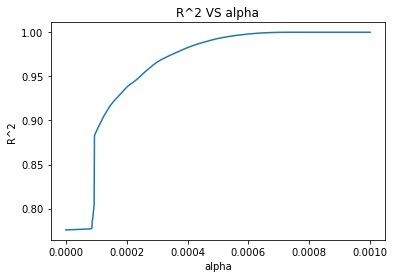

In [3]:
# (c)
import matplotlib.pyplot as plt
%matplotlib inline

# Randomly split data into training and testing - 80% training, 20% testing.
size = len(X.index)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
alphas = np.logspace(-8,-3,1000)
from sklearn.linear_model import Lasso
scores = [] #R^2

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    
plt.plot(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 VS alpha')

/Users/guanshan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


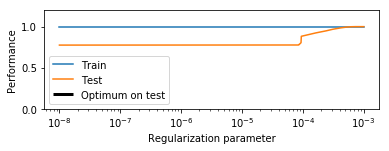

In [4]:
# (d)
plt.subplot(2, 1, 1)

# Fill these in
alphas = np.logspace(-8, -3, 1000)
train_errors=[]
test_errors=[]
alpha_optim=0

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))   
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test)) 
 
    
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

Optimal regularization parameter : 0.000749678187497


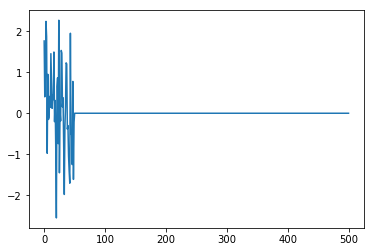

In [5]:
 # (e)
    
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
regr.set_params(alpha=alpha_optim)
coef_ = regr.fit(X, y).coef_   
plt.plot(coef_)


# Since LASSO has constant power to drag the coefficients to 0, so many coeeficients become 0 in the end.

In [6]:
# (f)

from sklearn.model_selection import cross_val_score
best_alpha=alphas[np.argmax(scores)]
regr = Lasso(alpha=best_alpha)
scores = cross_val_score(regr, X, y, cv=5)
scores

/Users/guanshan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.99488633,  0.99999818,  0.99594696,  0.9999929 ,  0.99999715])

In [7]:
# (g)
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

alpha_best = alphas[np.argmax(scores)]
print("Optimal regularization parameter : %s" % alpha_best)
coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)

Optimal regularization parameter : 1.01159111222e-08


/Users/guanshan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


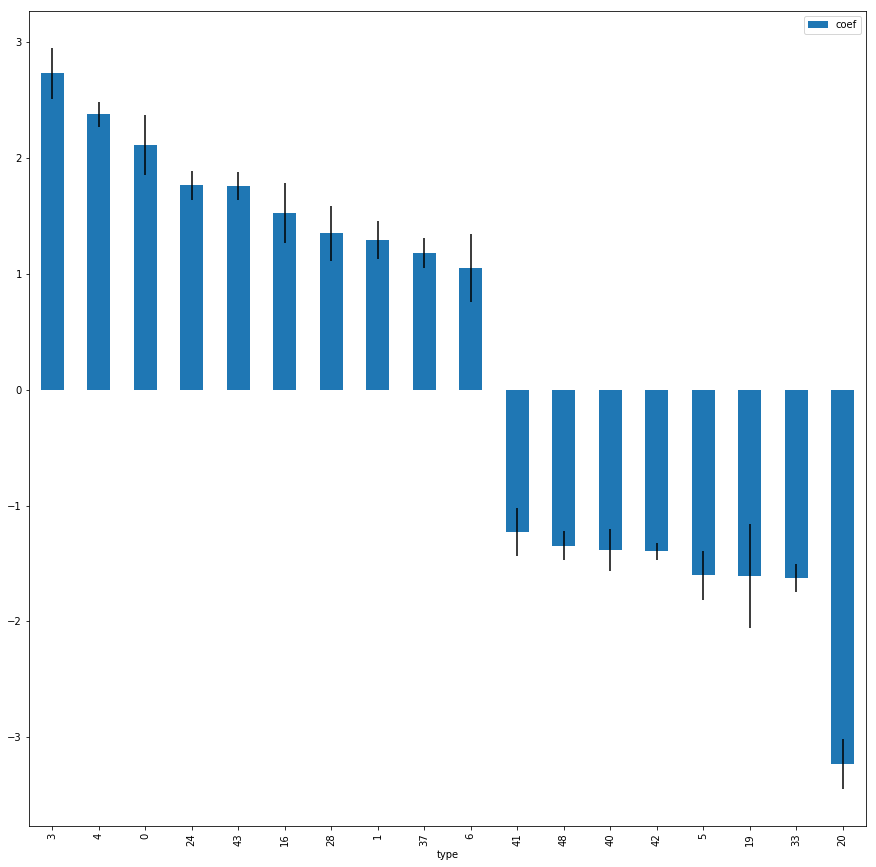

In [8]:

def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ] # dataframe
plt.figure(figsize=(15,15))

dfCoeffs_sorted = dfCoeffs.sort_values(by=['coef'], ascending=[True])[::-1]
# [::-1] get the descending order, default is ascending

yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))